## EfficientNet-Based Concrete Crack Detection System - Part 1

This Jupyter notebook is the first part of the concrete crack detection system based on SDNET2018 dataset.
This part of the code concerns exploratory data analysis of the SDNET2018 dataset, as well as preparations prior to the model training (train/test/validation split, reorganizing files into folder format).
Please refer to the second part of the code "Concrete Crack Detection SDNET2018 - Model.ipynb" for the model construction and training portion of the code.

## Library Imports

import os
import cv2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
from itertools import product
from sklearn.model_selection import train_test_split

np.random.seed(42)

### Reading Data Files in Directory

The list of image files are first read from the respective folders, and subsequently populated into a DataFrame alongside its structure type and condition.

***Please ensure that the data files are in the correct format prior to running the remaining portion of the code (the uploaded dataset will be in a .zip format, simply extract to /SDNET2018/)***

Data
∟ SDNET2018
  ∟ D
    ∟ CD
    ∟ test (empty folder)
    ∟ train (empty folder)
    ∟ UD
    ∟ validation (empty folder)
  ∟ P
    ∟ CD
    ∟ test (empty folder)
    ∟ train (empty folder)
    ∟ UD
    ∟ validation (empty folder)
  ∟ W
    ∟ CD
    ∟ test (empty folder)
    ∟ train (empty folder)
    ∟ UD
    ∟ validation (empty folder)

### 1) SDNET2018 Dataset

In [2]:
img_dir = pd.Series(glob(os.getcwd() + '\\Data\\SDNET2018\\*\\*\\*.jpg'))

img_con = img_dir.apply(lambda x: x.split('\\')[-2][0])
img_typ = img_dir.apply(lambda x: x.split('\\')[-2][1])

img_all = pd.DataFrame({'type': img_typ,
                        'class': img_con,
                        'filename': img_dir})

img_all['type'] = img_all['type'].map({'D': 'Deck', 
                                       'P': 'Pavement',
                                       'W': 'Wall'})

img_all['class'] = img_all['class'].map({'C': 'Cracked', 
                                         'U': 'Uncracked'})

### 2) Ozgenel Dataset

In [3]:
img_dir2 = pd.Series(glob(os.getcwd() + '\\Data\\Ozgenel\\*\\*.jpg'))

img_con2 = img_dir2.apply(lambda x: x.split('\\')[-2])

img_all2 = pd.DataFrame({'class': img_con2,
                         'filename': img_dir2})

## Image Data Sampling for Illustration

### 1) Comparing Image Samples from the SDNET2018 Dataset and the Ozgenel Dataset

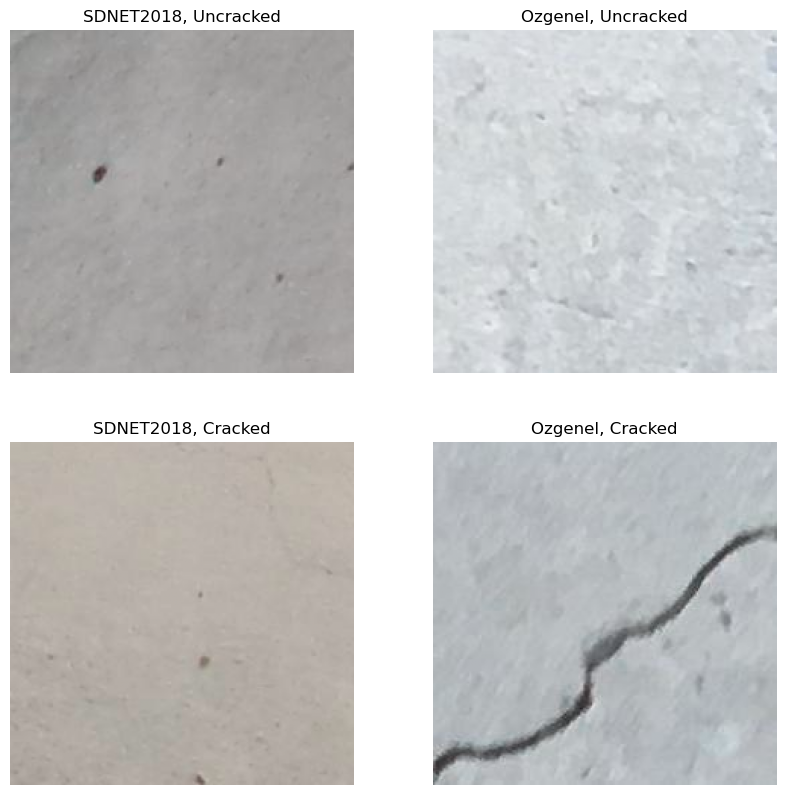

In [4]:
dir_sdnet_uncracked = img_all[(img_all['type']=='Wall') & (img_all['class']=='Uncracked')].sample(random_state=12)['filename'].values[0]
dir_sdnet_cracked = img_all[(img_all['type']=='Wall') & (img_all['class']=='Cracked')].sample(random_state=12)['filename'].values[0]
dir_ozgenel_uncracked = img_all2[(img_all2['class']=='Negative')].sample(random_state=12)['filename'].values[0]
dir_ozgenel_cracked = img_all2[(img_all2['class']=='Positive')].sample(random_state=12)['filename'].values[0]

img_sdnet_uncracked = cv2.imread(dir_sdnet_uncracked)
img_sdnet_cracked = cv2.imread(dir_sdnet_cracked)
img_ozgenel_uncracked = cv2.imread(dir_ozgenel_uncracked)
img_ozgenel_cracked = cv2.imread(dir_ozgenel_cracked)

fig, ax = plt.subplots(2, 2, figsize=(10, 10), dpi=100)

ax[0, 0].imshow(img_sdnet_uncracked/255)
ax[0, 0].set_title('SDNET2018, Uncracked')
ax[0, 0].axis('off')

ax[0, 1].imshow(img_ozgenel_uncracked/255)
ax[0, 1].set_title('Ozgenel, Uncracked')
ax[0, 1].axis('off')

ax[1, 0].imshow(img_sdnet_cracked/255)
ax[1, 0].set_title('SDNET2018, Cracked')
ax[1, 0].axis('off')

ax[1, 1].imshow(img_ozgenel_cracked/255)
ax[1, 1].set_title('Ozgenel, Cracked')
ax[1, 1].axis('off');

### 2) Additional Samples from the Ozgenel Dataset

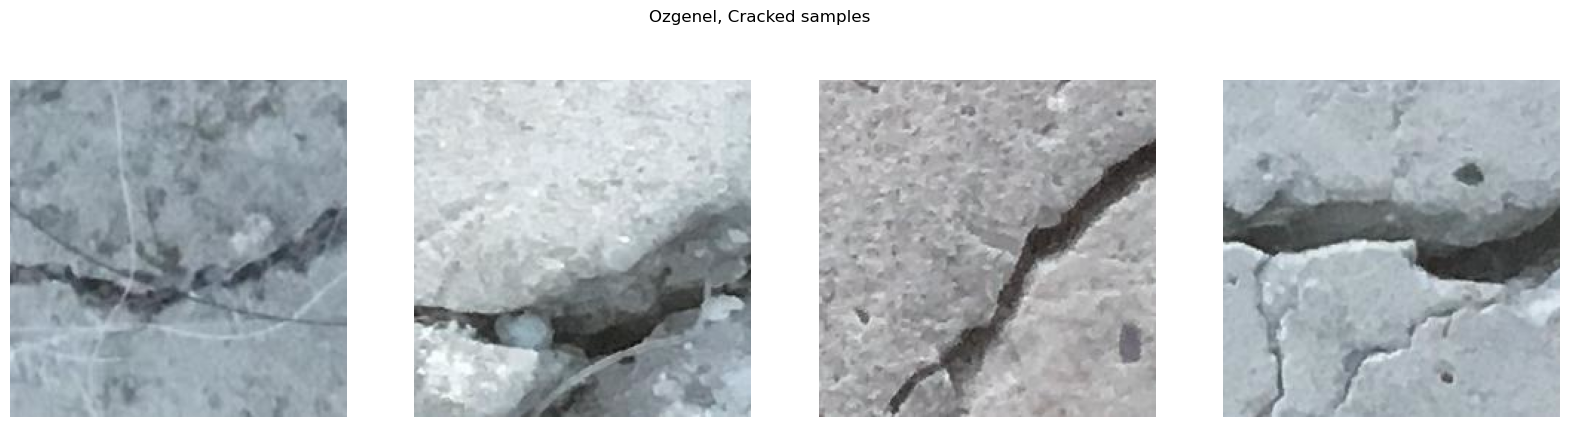

In [5]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5), dpi=100)

img_dirs = img_all2[(img_all2['class']=='Positive')].sample(n=4, random_state=34)['filename'].values

for i, img in enumerate(img_dirs):
    img_data = cv2.imread(img)
    
    ax[i].imshow(img_data)
    ax[i].axis('off')
    
fig.suptitle('Ozgenel, Cracked samples');

### 3) Additional Samples from the SDNET2018 Dataset

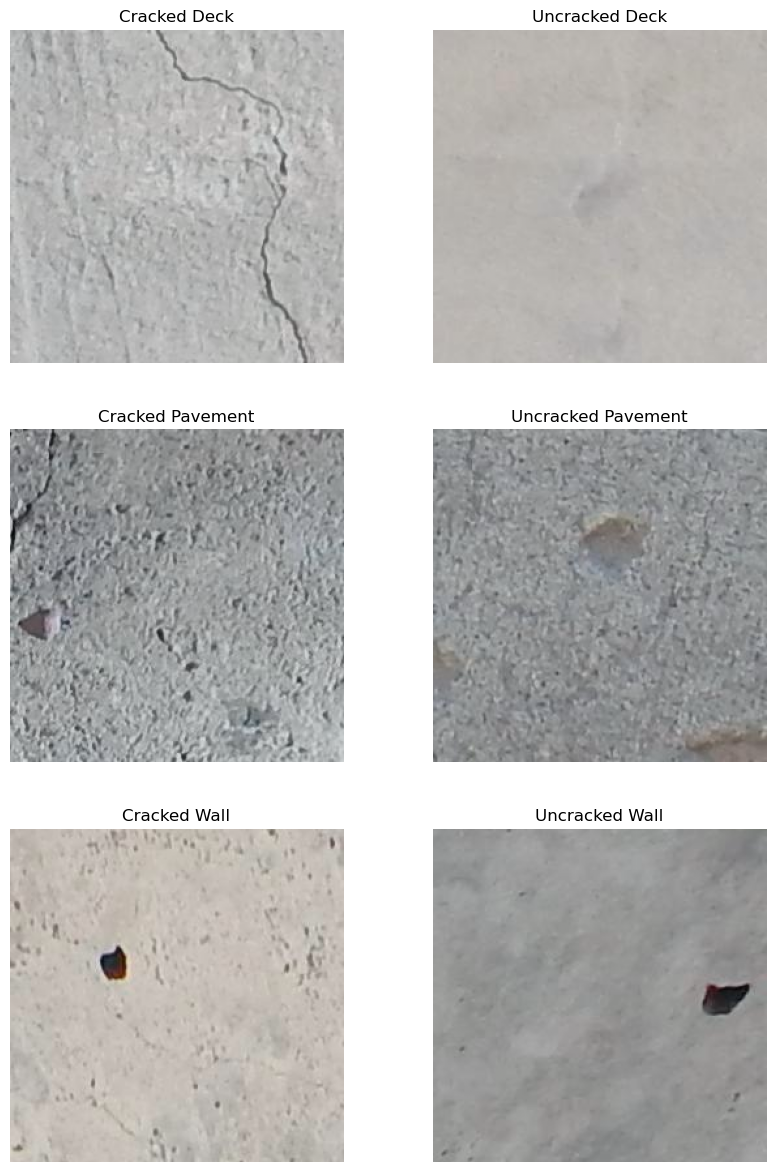

In [6]:
types = img_all['type'].unique()
conds = img_all['class'].unique()

fig, ax = plt.subplots(3, 2, figsize=(10, 15), dpi=100)

for t, c in product(types, conds):
    
    img_sam = img_all[(img_all['type']==t) & (img_all['class']==c)].sample(random_state=6)['filename'].values[0]
    img = cv2.imread(img_sam)/255
    
    row = np.where(types==t)[0][0]
    col = np.where(conds==c)[0][0]

    ax[row, col].imshow(img)
    ax[row, col].set_title(c + ' ' + t)
    ax[row, col].axis('off')

## Data Pre-processing

### 1) Separating the SDNET2018 Image Data by Concrete Structure Type

In [7]:
img_d = img_all[img_all['type']=='Deck']
img_p = img_all[img_all['type']=='Pavement']
img_w = img_all[img_all['type']=='Wall']

### 2) Performing a Stratified Train/Test/Validation Split of the Image Data

The train/test/validation split is 0.7/0.15/0.15 in ratio

In [8]:
# Separating the data into train, test, and validation set

img_d_trn, img_d_tes = train_test_split(img_d, test_size=int(0.15*len(img_d)), stratify=img_d['class'])
img_d_trn, img_d_val = train_test_split(img_d_trn, test_size=int(0.15*len(img_d)), stratify=img_d_trn['class'])

img_p_trn, img_p_tes = train_test_split(img_p, test_size=int(0.15*len(img_p)), stratify=img_p['class'])
img_p_trn, img_p_val = train_test_split(img_p_trn, test_size=int(0.15*len(img_p)), stratify=img_p_trn['class'])

img_w_trn, img_w_tes = train_test_split(img_w, test_size=int(0.15*len(img_w)), stratify=img_w['class'])
img_w_trn, img_w_val = train_test_split(img_w_trn, test_size=int(0.15*len(img_w)), stratify=img_w_trn['class'])

### 3a) Function to Reorganize the Image Data into its Respective Data Split

In [9]:
def reorganize(df, split):
    
    cracked = df.loc[df['class']=='Cracked', 'filename'].tolist()
    uncracked = df.loc[df['class']=='Uncracked', 'filename'].tolist()
    
    for f in cracked:
        new_dir = ('\\').join(f.split('\\')[:-2])+'\\'+split+'\\Cracked\\'+f.split('\\')[-1]
        os.rename(f, new_dir)
        
    for f in uncracked:
        new_dir = ('\\').join(f.split('\\')[:-2])+'\\'+split+'\\Uncracked\\'+f.split('\\')[-1]
        os.rename(f, new_dir)

### 3b) Running the Function to Reorganize the Image Data on all the Data Splits

In [10]:
reorganize(img_d_tes, 'test')
reorganize(img_d_trn, 'train')
reorganize(img_d_val, 'validation')

reorganize(img_p_tes, 'test')
reorganize(img_p_trn, 'train')
reorganize(img_p_val, 'validation')

reorganize(img_w_tes, 'test')
reorganize(img_w_trn, 'train')
reorganize(img_w_val, 'validation')